In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"E:\Data Analyst\Projects\Finance\financial_loan.csv")
df.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,238612,NY,INDIVIDUAL,< 1 year,Rochester Institute of Technology,A,RENT,2021-01-08,10-06-2021,10-06-2021,...,A4,36 months,Not Verified,30000.0,0.0368,62.74,0.0807,2000,2,2240
1,349714,TN,INDIVIDUAL,2 years,Rothschild and Associates PLLC,B,RENT,2021-06-08,16-05-2021,08-12-2021,...,B4,36 months,Verified,42000.0,0.0326,243.38,0.1039,7500,2,1460
2,149575,SC,INDIVIDUAL,< 1 year,First Federal,A,RENT,2021-11-07,09-10-2021,09-10-2021,...,A5,36 months,Not Verified,30000.0,0.0420,315.12,0.0838,10000,2,11122
3,88854,NY,INDIVIDUAL,4 years,Rail Europe Group,A,RENT,2021-08-07,07-05-2021,08-03-2021,...,A2,36 months,Not Verified,200000.0,0.0028,155.38,0.0743,5000,2,5174
4,1062654,CA,INDIVIDUAL,4 years,AEG LIVE,B,RENT,2021-08-11,13-10-2021,13-09-2021,...,B3,36 months,Not Verified,35000.0,0.0401,165.38,0.1171,5000,3,5728


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

Find the null

In [9]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

Find the Duplicates

In [11]:
df.duplicated().sum()

0

In [31]:
date_cols=['issue_date','last_credit_pull_date','last_payment_date','next_payment_date']

In [33]:
for col in date_cols:
    df[col]=pd.to_datetime(df[col],errors='coerce')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  7213 non-null   datetime64[ns]
 9   last_payment_date      16143 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      16143 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

KPI’S

Total Loan Applications

In [41]:
Total_Loan_Applications=df['id'].count()
Total_Loan_Applications

38576

MTD Total Loan Applications

In [52]:
MTD_Total_Loan_Applications=df[df['issue_date'].dt.month==12]['id'].count()
MTD_Total_Loan_Applications

4314

PMTD Total Loan Applications

In [56]:
PMTD_Total_Loan_Applications=df[df['issue_date'].dt.month==11]['id'].count()
PMTD_Total_Loan_Applications

4035

Mom Total Loan Applications

In [60]:
Mom_Total_Loan_Applications=(MTD_Total_Loan_Applications-PMTD_Total_Loan_Applications)*100/PMTD_Total_Loan_Applications
Mom_Total_Loan_Applications

6.91449814126394

Total Funded Amont

In [66]:
Total_Funded_Amont= df['loan_amount'].sum()
Total_Funded_Amont

435757075

MTM Total Funded Amont

In [72]:
MTM_Total_Funded_Amont=df[df['issue_date'].dt.month==12]['loan_amount'].sum()
MTM_Total_Funded_Amont

53981425

PMTM Total Funded Amont

In [74]:
PTM_Total_Funded_Amont=df[df['issue_date'].dt.month==11]['loan_amount'].sum()
PTM_Total_Funded_Amont

47754825

MoM Total Funded Amont

In [76]:
MoM_Total_Funded_Amont=(MTM_Total_Funded_Amont-PTM_Total_Funded_Amont)*100/PTM_Total_Funded_Amont
MoM_Total_Funded_Amont

13.038682478681473

Total Amount Received

In [78]:
Total_Amount_Received=df['total_payment'].sum()
Total_Amount_Received

473070933

In [82]:
MTD_Total_Amount_Received=df[df['issue_date'].dt.month==12]['total_payment'].sum()
MTD_Total_Amount_Received

58074380

In [84]:
PMTD_Total_Amount_Received=df[df['issue_date'].dt.month==11]['total_payment'].sum()
PMTD_Total_Amount_Received

50132030

In [86]:
MoM_Total_Amount_Received=(MTD_Total_Amount_Received-PMTD_Total_Amount_Received)*100/PMTD_Total_Amount_Received
MoM_Total_Amount_Received

15.842865329810104

Avg Intrest Rate

In [96]:
Avg_Intrest_Rate=df['int_rate'].mean()*100
Avg_Intrest_Rate

12.048831397760265

In [100]:
MTD_Avg_Intrest_Rate=df[df['issue_date'].dt.month==12]['int_rate'].mean()*100
MTD_Avg_Intrest_Rate

12.3560407974038

In [106]:
PMTD_Avg_Intrest_Rate=df[df['issue_date'].dt.month==11]['int_rate'].mean()*100
PMTD_Avg_Intrest_Rate

11.94171747211896

In [108]:
MOM_Avg_Intrest_Rate=(MTD_Avg_Intrest_Rate-PMTD_Avg_Intrest_Rate)*100/PMTD_Avg_Intrest_Rate
MOM_Avg_Intrest_Rate

3.4695455344022816

Avg DTI

In [110]:
Avg_DTI=df['dti'].mean()*100
Avg_DTI

13.32743311903774

In [112]:
MTD_Avg_DTI=df[df['issue_date'].dt.month==12]['dti'].mean()*100
MTD_Avg_DTI

13.665537783959202

In [114]:
PMTD_Avg_DTI=df[df['issue_date'].dt.month==11]['dti'].mean()*100
PMTD_Avg_DTI

13.302733581164809

In [116]:
MOM_Avg_DTI=(MTD_Avg_DTI-PMTD_Avg_DTI)*100/PMTD_Avg_DTI
MOM_Avg_DTI

2.727290602196858

Good Loan KPI

Good_Loan_Percentage

In [126]:
Good_Loan_Percentage=df[df['loan_status'].isin(["Fully Paid","Current"])]['id'].count()*100/df['id'].count()
print(f"{Good_Loan_Percentage:.2f}%")

86.18%


Good Loan Application

In [136]:
Good_Loan_Application=df[df['loan_status'].isin(["Fully Paid","Current"])]['id'].count()
Good_Loan_Application

33243

Good Loan Funded Amount

In [142]:
Good_Loan_Funded_Amount=df[df['loan_status'].isin(["Fully Paid","Current"])]['loan_amount'].sum()
Good_Loan_Funded_Amount

370224850

Good Loan Received Amount

In [144]:
Good_Loan_Received_Amount=df[df['loan_status'].isin(["Fully Paid","Current"])]['total_payment'].sum()
Good_Loan_Received_Amount

435786170

Bad Loan Application

In [148]:
Bad_Loan_Application=df[df['loan_status'].isin(["Charged Off"])]['id'].count()
Bad_Loan_Application

5333

Bad Loan Percentage

In [158]:
Bad_Loan_Percentage=df[df['loan_status'].isin(["Charged Off"])]['id'].count()*100/df['id'].count()
print(f"{Bad_Loan_Percentage:.2f}")

13.82


Bad Loan Funded Amount

In [ ]:
Bad_Loan_Funded_Amount=df[df['loan_status'].isin(["Charged Off"])]['loan_amount'].sum()
Bad_Loan_Funded_Amount

Bad Loan Received Amount

In [162]:
Bad_Loan_Received_Amount=df[df['loan_status'].isin(["Charged Off"])]['total_payment'].sum()
Bad_Loan_Received_Amount

37284763

In [190]:
Status_Loan_Count=df.groupby('loan_status')['id'].count().reset_index().sort_values(by='id',ascending=False)
Status_Loan_Count

,loan_status,id
2,Fully Paid,32145
0,Charged Off,5333
1,Current,1098


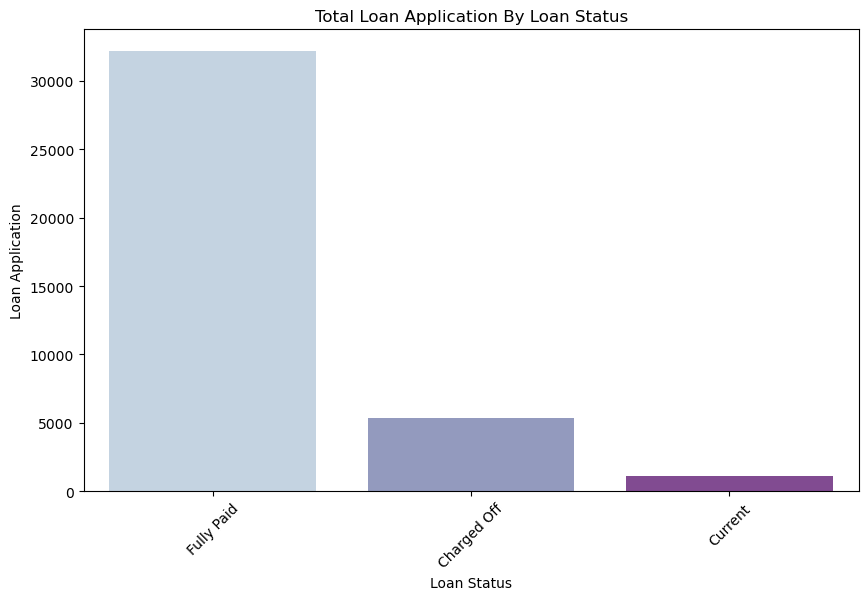

In [232]:
plt.figure(figsize=(10,6))
sns.barplot(x='loan_status',y='id',data=Status_Loan_Count,palette="BuPu",hue='loan_status')
plt.title("Total Loan Application By Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Application")
plt.xticks(rotation=45)
plt.show()

Loan Status By Funded Amount

In [218]:
Loan_Status_By_Funded_Amount=df.groupby('loan_status')['loan_amount'].sum().reset_index().sort_values(by='loan_amount',ascending=False)
Loan_Status_By_Funded_Amount

,loan_status,loan_amount
2,Fully Paid,351358350
0,Charged Off,65532225
1,Current,18866500


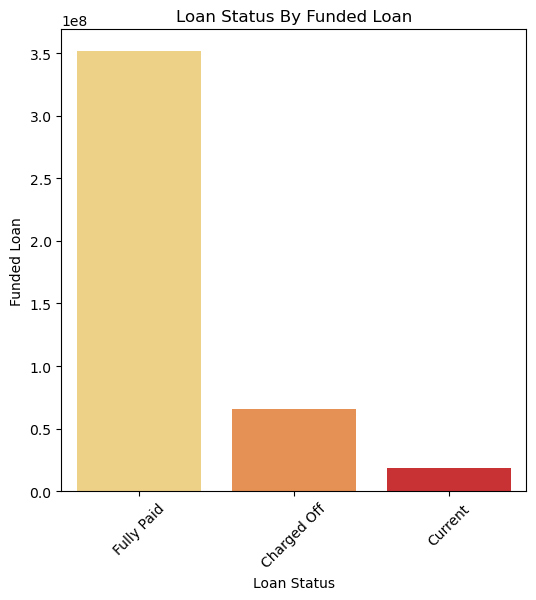

In [230]:
plt.figure(figsize=(6,6))
sns.barplot(x='loan_status',y='loan_amount',data=Loan_Status_By_Funded_Amount,palette = "YlOrRd",hue='loan_status')
plt.title("Loan Status By Funded Loan")
plt.xlabel("Loan Status")
plt.ylabel("Funded Loan")
plt.xticks(rotation=45)
plt.show()

Loan Status By Received Amount

In [236]:
Loan_Status_By_Received_Amount=df.groupby('loan_status')['total_payment'].sum().reset_index().sort_values(by='total_payment',ascending=False)
Loan_Status_By_Received_Amount

,loan_status,total_payment
2,Fully Paid,411586256
0,Charged Off,37284763
1,Current,24199914


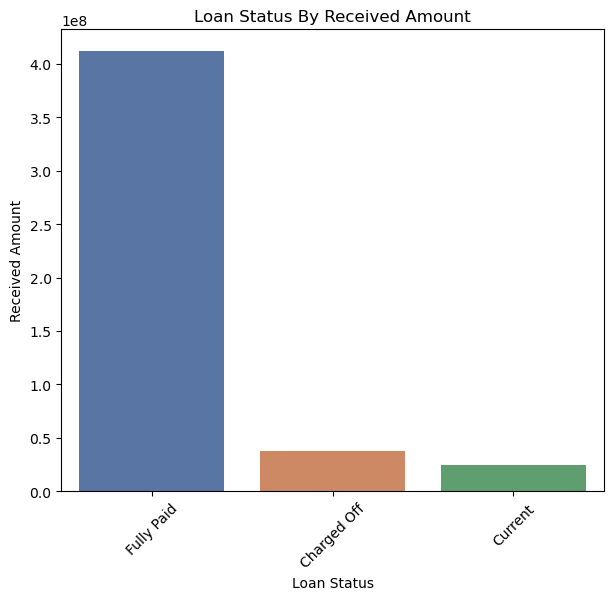

In [242]:
plt.figure(figsize=(7,6))
sns.barplot(x='loan_status',y='total_payment',data=Loan_Status_By_Received_Amount,palette="deep", hue='loan_status')
plt.title("Loan Status By Received Amount")
plt.xlabel("Loan Status")
plt.ylabel("Received Amount")
plt.xticks(rotation=45)
plt.show()

Loan Status By Int Rate

In [252]:
Loan_Status_By_Int_Rate=df.groupby('loan_status')['int_rate'].mean().reset_index().assign(int_rate=lambda x: x['int_rate'] * 100).sort_values(by='int_rate',ascending=False)
Loan_Status_By_Int_Rate

,loan_status,int_rate
1,Current,15.099326
0,Charged Off,13.878575
2,Fully Paid,11.641071


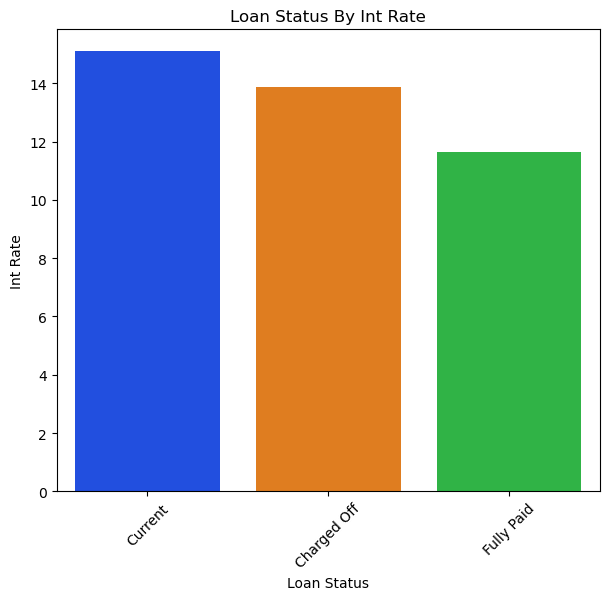

In [254]:
plt.figure(figsize=(7,6))
sns.barplot(x='loan_status',y='int_rate',data=Loan_Status_By_Int_Rate,palette="bright",hue='loan_status')
plt.title("Loan Status By Int Rate")
plt.xlabel("Loan Status")
plt.ylabel("Int Rate")
plt.xticks(rotation=45)
plt.show()

Loan Status By DTI

In [257]:
Loan_Status_By_DTI=df.groupby('loan_status')['dti'].mean().reset_index().assign(int_rate=lambda x: x['dti'] * 100).sort_values(by='dti',ascending=False)
Loan_Status_By_DTI

,loan_status,dti,int_rate
1,Current,0.147243,14.724344
0,Charged Off,0.140047,14.004733
2,Fully Paid,0.131674,13.167351


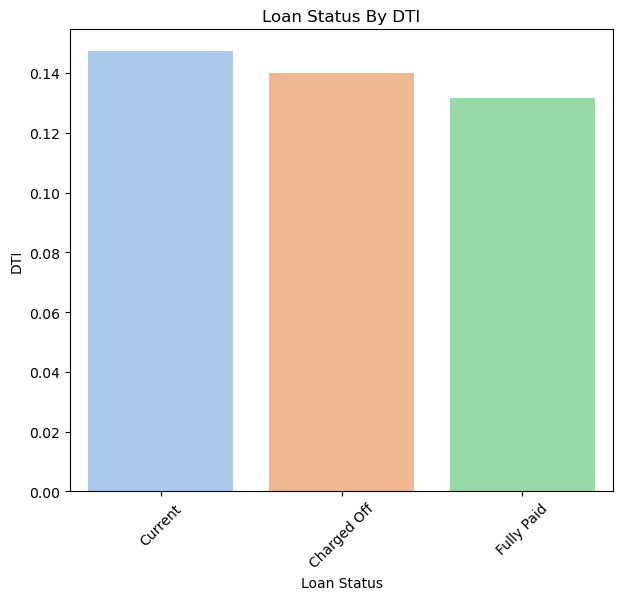

In [295]:
plt.figure(figsize=(7,6))
sns.barplot(x='loan_status',y='dti',data=Loan_Status_By_DTI,palette="pastel",hue='loan_status')
plt.title("Loan Status By DTI")
plt.xlabel("Loan Status")
plt.ylabel("DTI")
plt.xticks(rotation=45)
plt.show()

Loan Application By Month

In [305]:
df['issue_month']=df['issue_date'].dt.month
df.head(1)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,issue_month
0,238612,NY,INDIVIDUAL,< 1 year,Rochester Institute of Technology,A,RENT,2021-01-08,2021-10-06,2021-10-06,...,36 months,Not Verified,30000.0,0.0368,62.74,0.0807,2000,2,2240,1


In [313]:
Loan_Application_By_Month=df.groupby('issue_month')['id'].count().reset_index().sort_values(by='issue_month',ascending=True)
Loan_Application_By_Month

,issue_month,id
0,1,2332
1,2,2279
2,3,2627
3,4,2755
4,5,2911
5,6,3184
6,7,3366
7,8,3441
8,9,3536
9,10,3796


In [315]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

In [317]:
Loan_Application_By_Month['issue_month'] = Loan_Application_By_Month['issue_month'].map(month_map)

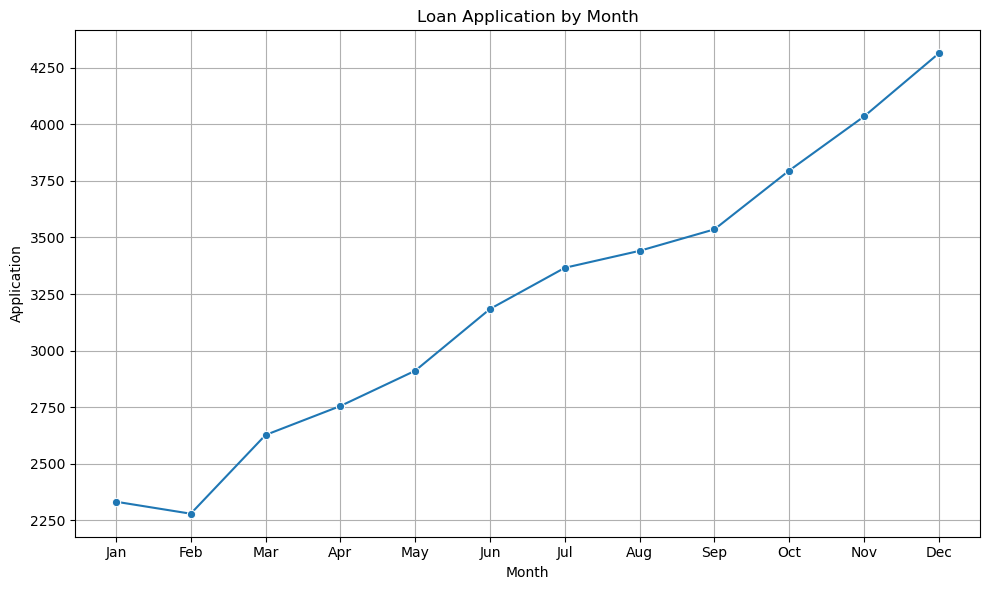

In [343]:
plt.figure(figsize=(10,6))
sns.lineplot(x='issue_month',y='id',data=Loan_Application_By_Month,marker='o')
plt.title("Loan Application by Month")
plt.xlabel("Month")
plt.ylabel("Application")
plt.tight_layout()
plt.grid(True)
plt.show()

Loan Application By Employyee Length

In [354]:
Loan_Application_By_Employyee_Length=df.groupby('emp_length')['id'].count().reset_index().sort_values(by='id',ascending=False)
Loan_Application_By_Employyee_Length

,emp_length,id
1,10+ years,8870
10,< 1 year,4575
2,2 years,4382
3,3 years,4088
4,4 years,3428
5,5 years,3273
0,1 year,3229
6,6 years,2228
7,7 years,1772
8,8 years,1476


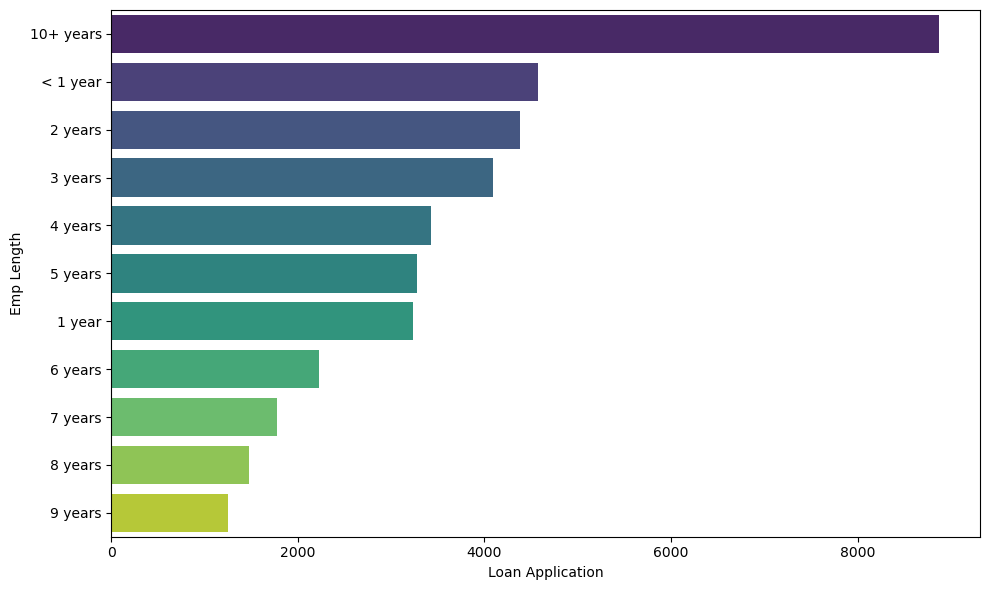

In [368]:
plt.figure(figsize=(10,6))
sns.barplot(x='id',y='emp_length',data=Loan_Application_By_Employyee_Length,hue='emp_length',palette='viridis')
plt.xlabel("Loan Application")
plt.ylabel("Emp Length")
plt.tight_layout()
plt.show()

Total Loan Application By Purpose

In [362]:
Total_Loan_Application_By_Purpose=df.groupby('purpose')['id'].count().reset_index().sort_values(by='id',ascending=False)
Total_Loan_Application_By_Purpose

,purpose,id
0,Debt consolidation,18214
2,credit card,4998
9,other,3824
4,home improvement,2876
6,major purchase,2110
11,small business,1776
1,car,1497
13,wedding,928
7,medical,667
8,moving,559


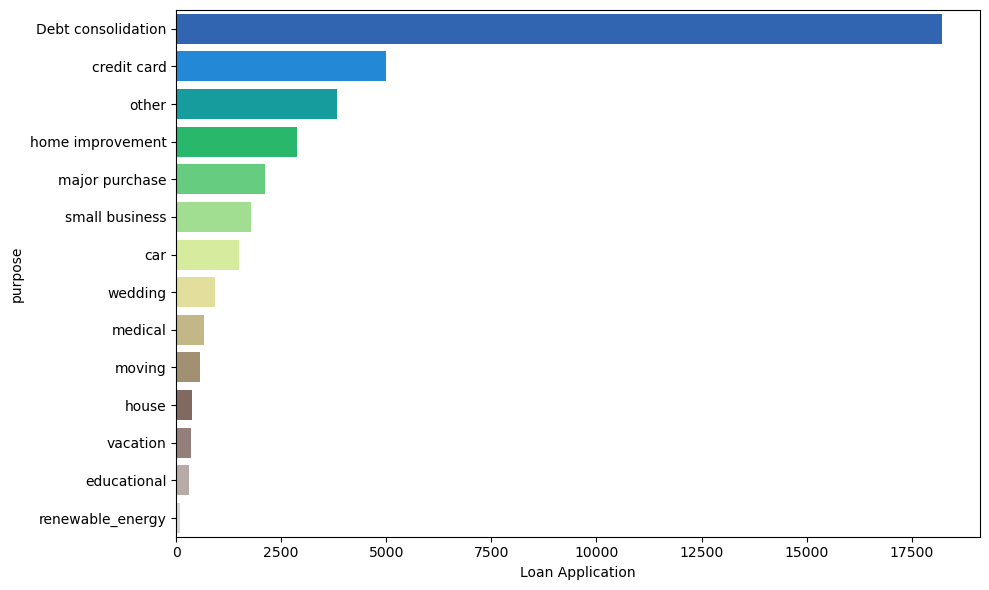

In [366]:
plt.figure(figsize=(10,6))
sns.barplot(x='id',y='purpose',data=Total_Loan_Application_By_Purpose,hue='purpose',palette='terrain')
plt.xlabel("Loan Application")
plt.ylabel("Purpose")
plt.tight_layout()
plt.show()

In [ ]:
Total Loan Application By Term

In [373]:
Total_Loan_Application_By_Term=df.groupby('term')['id'].count().reset_index()
Total_Loan_Application_By_Term

,term,id
0,36 months,28237
1,60 months,10339


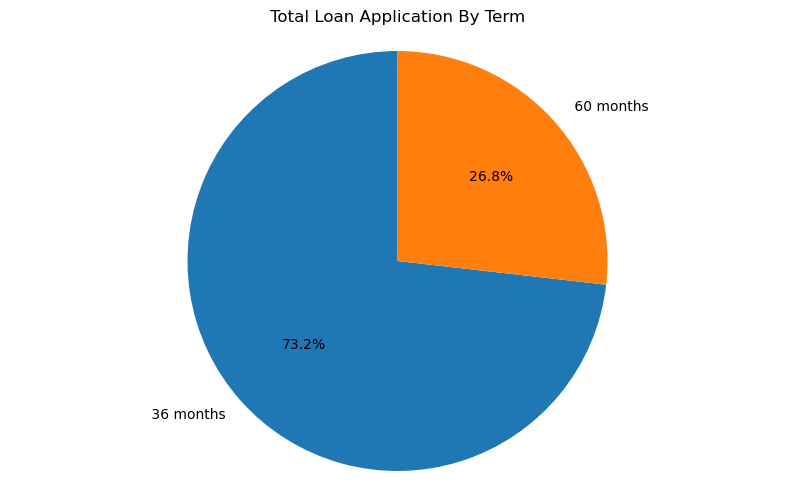

In [381]:
plt.figure(figsize=(10,6))
plt.pie(Total_Loan_Application_By_Term['id'],
       labels=Total_Loan_Application_By_Term['term'],
       autopct='%1.1f%%',
       startangle=90)
plt.title("Total Loan Application By Term")
plt.axis('equal')
plt.show()

Loan Application By Home Ownership

In [405]:
Loan_Application_By_Home_Ownership=df.groupby('home_ownership')['id'].count().reset_index().sort_values(by='id',ascending=False)
Loan_Application_By_Home_Ownership

,home_ownership,id
4,RENT,18439
0,MORTGAGE,17198
3,OWN,2838
2,OTHER,98
1,NONE,3


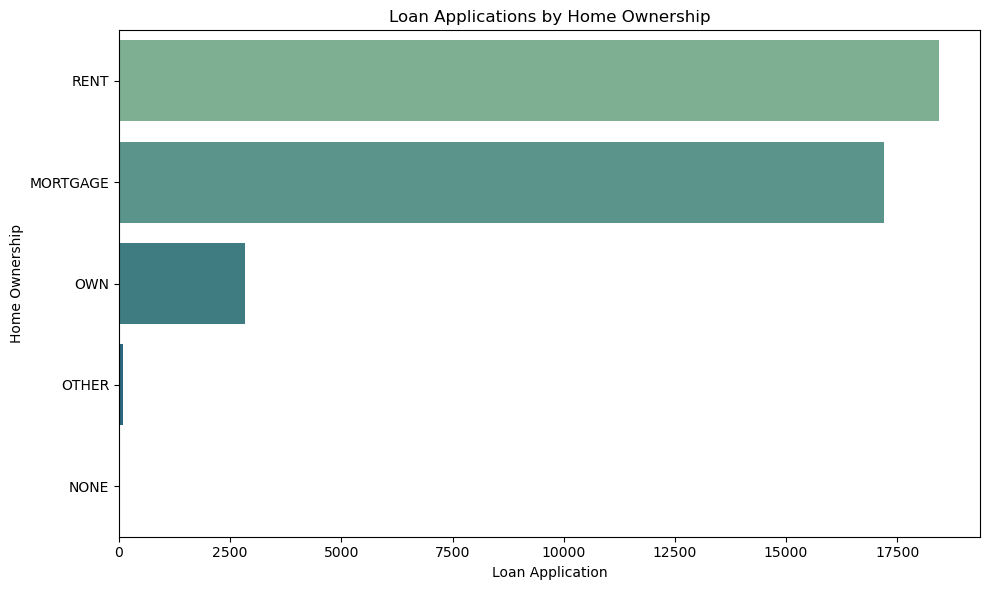

In [419]:
plt.figure(figsize=(10,6))
sns.barplot(x='id',y='home_ownership',data=Loan_Application_By_Home_Ownership,hue='home_ownership',palette='crest')
plt.title("Loan Applications by Home Ownership", )  
plt.xlabel('Loan Application')
plt.ylabel("Home Ownership")
plt.tight_layout()  
plt.show()

Loan Application By State

In [425]:
Loan_Application_By_State=df.groupby('address_state')['id'].count().reset_index().sort_values(by='id',ascending=False).head(10)
Loan_Application_By_State

,address_state,id
4,CA,6894
33,NY,3701
9,FL,2773
42,TX,2664
30,NJ,1822
14,IL,1486
37,PA,1482
44,VA,1375
10,GA,1355
19,MA,1310


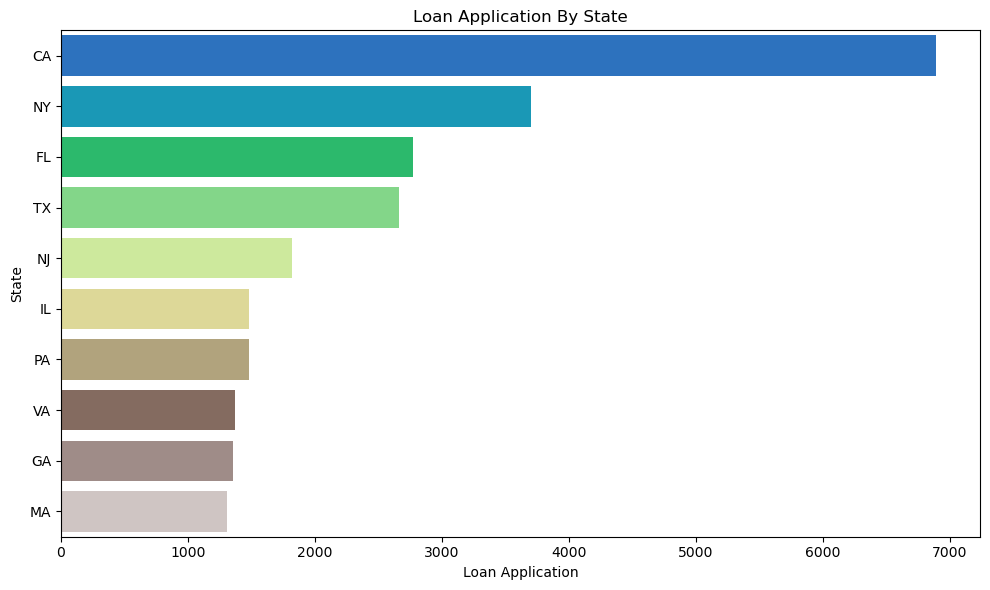

In [431]:
plt.figure(figsize=(10,6))
sns.barplot(x='id',y='address_state',data=Loan_Application_By_State,hue='address_state',palette='terrain')
plt.title("Loan Application By State")
plt.xlabel("Loan Application")
plt.ylabel("State")
plt.tight_layout()
plt.show()